# Rudiments of Frequency Analysis

Christophe@pallier.org - Jan 2017 

(Note: I am reusing some code from http://tinyurl.com/fourierpython)

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show
import numpy as np
from numpy import pi, sin, cos
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

## The concepts of Amplitude, Frequency and Phase for a sinewave

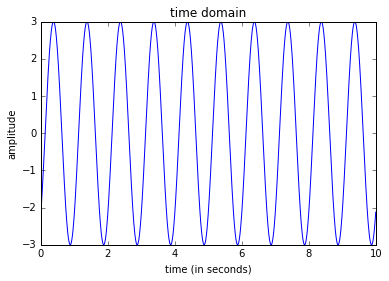

In [54]:
freq = 1 #hz - cycles per second
phase = pi / 4.0
amplitude = 3


time_to_plot = 10 # second
sample_rate = 100 # samples per second
num_samples = sample_rate * time_to_plot

time = np.linspace(0, time_to_plot, num_samples)
signal = amplitude*sin((2*pi*freq*time) - phase)

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plot(time, signal)

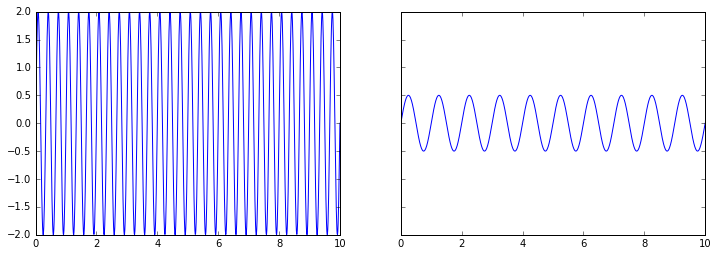

In [55]:
freq1 = 3; amp1 = 2; phase1 = 0
freq2 = 1; amp2 = 0.5; phase2 = 0

y1 = amp1*sin((2*pi*freq1*time) - phase1)
y2 = amp2*sin((2*pi*freq2*time) - phase2)

f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(12, 4)
axarr[0].plot(time, y1)
axarr[1].plot(time, y2)
_ = plt.show()

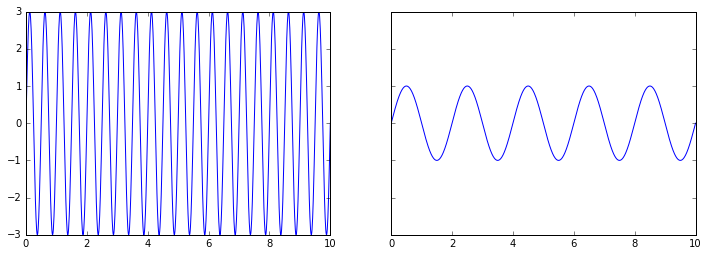

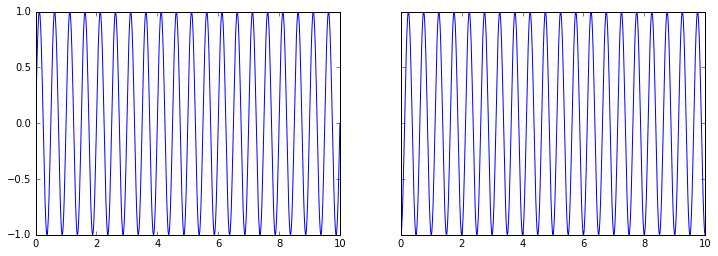

In [56]:
# Now using diffent sets of parameters:

params = ((3, 2, 0, 1, 0.5, 0),
        (1, 2, 0, 1, 2, pi/2))

for amp1, freq1, phase1, amp2, freq2, phase2 in params:
    y1 = amp1*sin((2*pi*freq1*time) - phase1)
    y2 = amp2*sin((2*pi*freq2*time) - phase2)
    f, axarr = plt.subplots(1, 2, sharey=True)
    f.set_size_inches(12, 4)
    axarr[0].plot(time, y1)
    axarr[1].plot(time, y2)
    
show()

## Summing sinewaves

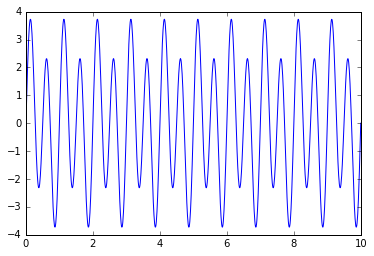

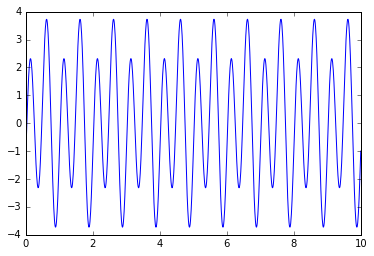

In [57]:
params = ((3, 2, 0, 1, 1, 0),
        (3, 2, 0, 1, 1, pi/2))

for a1, f1, p1, a2, f2, p2 in params:
    y1 = a1*sin((2*pi*f1*time) - p1)
    y2 = a2*sin((2*pi*f2*time) - p2)
    plot(time, y1 + y2)
    show()


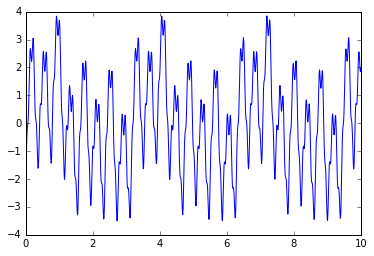

In [58]:
# summing more than 2 sine waves (6 here)

# Note; you can modify the following parameters and run the cell again:
f = (1,2,4,8,16,32)
a = (1,0.5,0.8,2,0.3,0.5)
p = (0,1,0,1,0,0)

y = np.zeros(len(time))
for i in range(len(f)):
    y = y + a[i] * sin(2*f[i]*time-p[i])

plot(time, y)
show()

# Decomposition

According to Fourier' theorem, any periodic signal can be expressed  as the finite sum of sinewaves of varying amplitudes, phases and frequencies (frequencies which are multiples of the original frequency of the signal (1/period).  

## Creating basis functions (sines ans cosines)

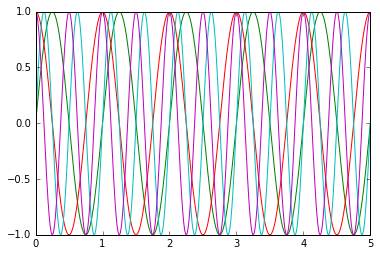

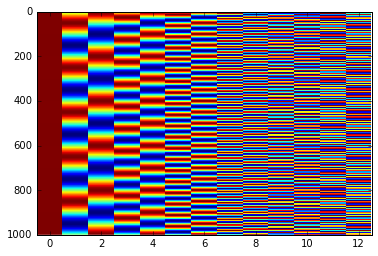

In [59]:
time = np.linspace(0, 5, 1000)
s0 = np.ones(len(time))
s1 = sin(2*pi*time); c1 = cos(2*pi*time)
s2 = sin(2*pi*2*time); c2 = cos(2*pi*2*time)
s3 = sin(2*pi*4*time); c3 = cos(2*pi*4*time)
s4 = sin(2*pi*8*time); c4 = cos(2*pi*8*time)
s5 = sin(2*pi*16*time); c5 = cos(2*pi*16*time)
s6 = sin(2*pi*32*time); c6 = cos(2*pi*32*time)
X = np.column_stack((s0, s1, c1, s2, c2, s3, c3, s4, c4, s5, c5, s6, c6))

plt.plot(time, X[:,:5])
show()

plt.imshow(X, aspect='auto', interpolation='none')
show()

## decomposing a signal on the basis functions using multiple linear regression

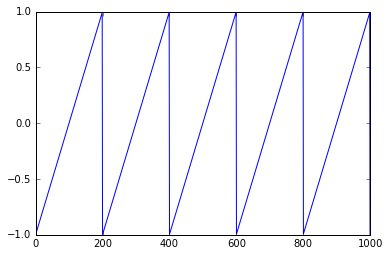

In [60]:
from scipy import signal
y =  signal.sawtooth(2 * np.pi * time)
plot(y)
show()

coeff = np.linalg.lstsq(X,y)[0]  # least square estimates

The coefficients represents the "spectrum" (beware: it is not the usual power spectrum!)

In [61]:
coeff

array([-0.00197628, -0.63661767, -0.00395257, -0.31830569, -0.00395257,
       -0.15914655, -0.00395257, -0.07956068, -0.00395257, -0.03975515,
       -0.00395257, -0.01982717, -0.00395257])

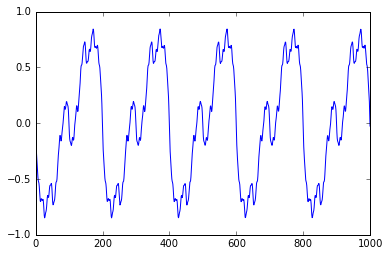

In [62]:
reconstructed_signal = X.dot(coeff)
plot(reconstructed_signal)
show()

In [ ]:
TODO: add fourier analysis and power spectrum